# Traffic Sign Classifier

This is the project two for term one. The main goal is to **design and test** a *Deep Learning model architecture* capable of **classifying images** from the [German Traffic Signs data set](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Used [anaconda](https://www.anaconda.com/) Python flavour (version 3.6.1), [scikit-learn](http://scikit-learn.org) (version 0.18.1), [TensorFlow GPU](https://www.tensorflow.org/) (version 1.3.0) and an open source library python dedicated for image and deep learning called [OpenCV](https://opencv.org/releases.html) (version 3.4.0).

For the solution proposed, the next techniques were applied:

* [Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html).
* [Data normalization](https://arxiv.org/pdf/1705.01809.pdf).
* [Shuffle training set](http://ieeexplore.ieee.org/document/8246726/?reload=true).
* [Batch Training](https://arxiv.org/abs/1711.00489).
* [Cross correlation](https://arxiv.org/abs/1309.5388).
* [Cross entropy](https://icml.cc/Conferences/2005/proceedings/papers/071_CrossEntropy_MannorEtAl.pdf).
* [Backpropagation](http://yann.lecun.com/exdb/publis/pdf/lecun-88.pdf).
* [Stochastic gradient based optimization](https://arxiv.org/abs/1412.6980).



This is a non exclusive list of openCV functions I used:
* [cv2.createCLAHE()](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html). Used for image contrast enhancement by applying adaptive histogram equalization.

* [cv2.resize()](https://docs.opencv.org/3.4.0/da/d6e/tutorial_py_geometric_transformations.html). Used for rescaling images to 32x32x3 size.


This is a non exhaustive list of Tensorflow functions I used:
* [tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder). Used to feed in the input image in tensor representation.
* [tf.global_variables_initializer()](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer). Used to initialize all trainable variables.
* [tf.ConfigProto()](https://www.tensorflow.org/programmers_guide/using_gpu). Used to set up GPU memory usage upper boundary.
* [tf.train.AdamOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer). Used for stochastic gradient-based optimization.
* [tf.nn.softmax_cross_entropy_with_logits()](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits). Used to compute cross-entropy between *output network scores* and *expected claseification labels*. However this function is deprecated. Notice that I used this function because I am working with *TensorFlow version 1.3*, but, for *TensorFlow 1.6 and above* you may want to use [tf.nn.softmax_cross_entropy_with_logits_v2](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2) instead.
* [tf.nn.conv2d()](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). Used to compute the cross correlation between kernels and receptive fields.
* [tf.nn.max_pool()](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool). Used for [downsampling](https://web.stanford.edu/class/cs448f/lectures/2.2/Fast%20Filtering.pdf) each incoming feature map and reduce trainable variables at the same time.
* [tf.nn.relu()](https://www.tensorflow.org/api_docs/python/tf/nn/relu). Used as non-linear activation function, especifically a [Rectified Linear Unit](https://arxiv.org/abs/1611.01491), for model solution proposed.
* [tf.Session()](https://www.tensorflow.org/programmers_guide/graphs). Used to run tensor operations on the static computational graph.
* [tf.train.Saver()](https://www.tensorflow.org/programmers_guide/saved_model). Used to save and restore model variables. Which in fact, retrieves values from the checkpoints using C,C++ libraries under the hood.
* [tf.nn.dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout). Used as regularization by dropping out units (both hidden and visible) in the model using pseudo-random probability depending of [tf.set_random_seed](https://www.tensorflow.org/api_docs/python/tf/set_random_seed) to form random seeds.





---
## Step 0: Load The Data

Training, validation and test sets are loaded in. Features and expected scores/labels are saved in independent variables.

In [1]:
# Load pickled data.
import pickle

# Path in for dataset.
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
# Features and labels are saved in independent variables.    
X_trainr, y_trainr = train['features'], train['labels']
X_validr, y_validr = valid['features'], valid['labels']
X_testr, y_testr = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES.



### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [48]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples.
n_train = len(X_trainr)

# Number of validation examples.
n_validation = len(X_validr)

# Number of testing examples.
n_test = len(X_testr)

# Shape of a traffic sign image.
image_shape = X_testr[0].shape

# Number of unique classes/labels there are in the dataset.
n_classes = len(set(y_trainr))

print("On this German Traffic Signs dataset we have:")
print("@ Number of training examples =", n_train)
print("@ Number of validation examples =", n_validation)
print("@ Number of testing examples =", n_test)
print("@ Image data shape =", image_shape)
print("@ Number of unique classes =", n_classes)

On this German Traffic Signs dataset we have:
@ Number of training examples = 34799
@ Number of validation examples = 4410
@ Number of testing examples = 12630
@ Image data shape = (32, 32, 3)
@ Number of unique classes = 43


### Exploratory visualization of the dataset

Here we visualize the German Traffic Signs Dataset using the pickled file(s). Especifically we are displaying:
* In the first figure: A sample of 20 images from the training set.
* In the seccond figure: A histogram(with distribution of classes) for the training and the validation set.
* In the third image: A histogram(with distribution of classes) for the test set.

From the first figure (with 20 samples of training images) we can subjectively notice that there is a brightness difference among the sampled images. Also, in some of these, a  high rate brightness variation is present (e.g. image located in third row, third column). This suggest brightness and contrast transfomation would be a good candidate for data preprocessing.

From data set histograms (training,validation and test) unbalanced data is present. So data augmentation could be a solution to increase model generalization. More specifically to increase the number of feature examples for the less common classes.

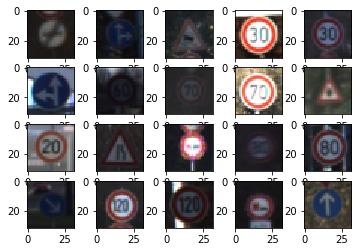

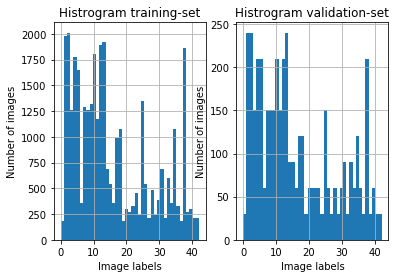

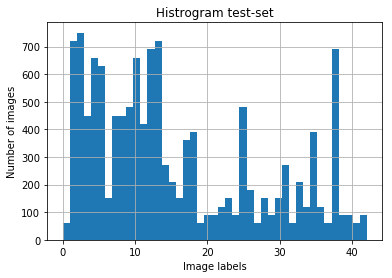

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(1)
plt.title('Sample of 20 image from the Training set')
for i in range (20):
    plt.subplot(4,5, i+1)
    plt.imshow(X_trainr[i*1000+1])


plt.figure(2)
plt.subplot(1,2, 1)
plt.hist(y_trainr, bins= n_classes)
plt.title('Histrogram training-set')
plt.xlabel('Image labels')
plt.ylabel('Number of images')
plt.grid(True)


plt.subplot(1,2, 2)
plt.hist(y_validr, bins= n_classes)
plt.title('Histrogram validation-set')
plt.xlabel('Image labels')
plt.ylabel('Number of images')
plt.grid(True)

plt.figure(3) 
plt.subplot(1,1, 1)
plt.hist(y_testr, bins= n_classes)
plt.title('Histrogram test-set')
plt.xlabel('Image labels')
plt.ylabel('Number of images')
plt.grid(True)

----

## Step 2: Design and Test a Model Architecture






### Step 2.1: Data preprocessing

After data exploration the follwing observations were taken into account to preprocess the data:
    
* Original input pixel image values range as usually was (0,255).
* The brighness among images use to highly variable.
* Some images have shown abrupt changes in brightness locally (very variable brightness in a single image).
* Data set was unbalanced.

This is the selected preprocessing approach:
    
Initially, it was considered to use gray scale images to have a more homogeneous contrast variation among the whole images dataset.
However, the three chanel colors representation was kept and all data preprocessing was done channel by channel. The previous idea was just an attempt to keep as much amount of possible usefull information on input data that the network might use during the weights tunning process.
In addition, to reduce abrupt changes present in some images it was decided to used histogram equalization by image sub-sections instead of using a global histogram equalization ([Click here for further information](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)).
By the other hand, even if the input data set was unbalanced it was wanted to [challenge the model generalization ability with unbalanced information](http://ieeexplore.ieee.org/document/6677603/) and penalized overfitting by using a regularization technique. More specifically, weights dropout during the training process.


#### Step 2.1.1: Contrast Limited Adaptive Histogram Equalization (CLAHE).

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html) was used to get a better contrast enhancement than the one gotten with global histogram equalization.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Working with copies/clones of original data
X_train = np.copy(X_trainr)
y_train = np.copy(y_trainr)

X_valid = np.copy(X_validr)
y_valid = np.copy(y_validr)

X_test = np.copy(X_testr)
y_test = np.copy(y_testr)



#  Contrast Limited Adaptive Histogram Equalization (CLAHE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

X_train[0][:,:,0] = clahe.apply(X_train[0][:,:,0])
X_train[0][:,:,1] = clahe.apply(X_train[0][:,:,1])
X_train[0][:,:,2] = clahe.apply(X_train[0][:,:,2])

# Applying CLAHE to training set.
for i in range(n_train):
    X_train[i][:,:,0] = clahe.apply(X_train[i][:,:,0])
    X_train[i][:,:,1] = clahe.apply(X_train[i][:,:,1])
    X_train[i][:,:,2] = clahe.apply(X_train[i][:,:,2])

# Applying CLAHE to validation set.
for i in range(n_validation):
    X_valid[i][:,:,0] = clahe.apply(X_valid[i][:,:,0])
    X_valid[i][:,:,1] = clahe.apply(X_valid[i][:,:,1])
    X_valid[i][:,:,2] = clahe.apply(X_valid[i][:,:,2])

# Applying CLAHE to test set.
for i in range(n_test):
    X_test[i][:,:,0] = clahe.apply(X_test[i][:,:,0])
    X_test[i][:,:,1] = clahe.apply(X_test[i][:,:,1])
    X_test[i][:,:,2] = clahe.apply(X_test[i][:,:,2])


A sample of 5 images is shown. It contains the original images and the corresponding images after contrast enhacement is applied.

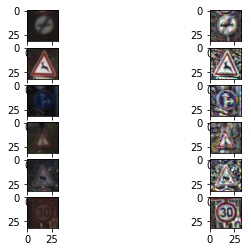

In [5]:
# Plotting some training images after applying CLAHE
plt.figure()
plt.title('Sample of images before and after contrast enhacement')
images_to_check = 6
pointer = 0
for i in range(images_to_check):
        
    plt.subplot(images_to_check,2, pointer+1)
    plt.imshow(X_trainr[i*500+1])
    
    plt.subplot(images_to_check,2, pointer+2)
    plt.imshow(X_train[i*500+1])
    
    pointer +=2

#### Step 2.1.2: Shuffled data.

Training data is shuffled before starting preprocessing.

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#### Step 2.1.3: Data manifold normalization.

Training set **mean** and **standard deviation** are computed to get zero-mean unit variace input data.

In [7]:
import numpy as np

tmean = np.mean(X_trainr)
tstd = np.std(np.copy(X_trainr) - tmean)

X_train= X_train - np.mean(X_train)
X_train = X_train / np.std(X_train)

X_valid = X_valid - np.mean(X_valid)
X_valid = X_valid /np.std(X_valid)

X_test= X_test - np.mean(X_test)
X_test = X_test / np.std(X_test)

So we had closer zero-mean unit-variance input data. Also, a sample of the images after normalization is displayed below:


Now we have aproximately data centered with unit-variance.
Training-set mean:  7.75561986837e-17
Training-set standard deviation:  1.0


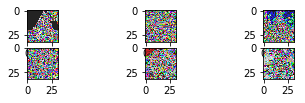

In [8]:
print('Now we have aproximately data centered with unit-variance.')
print('Training-set mean: ', np.mean(X_train))
print('Training-set standard deviation: ', np.std(X_train))

plt.figure()
plt.title('Sample of training images after normalization')
images_to_check = 6

for i in range(images_to_check):
       
    plt.subplot(images_to_check,3, i+1)
    plt.imshow(X_train[i*500+1])

#### Step 2.2: Solution Aproach.

Used a modified version of [LeNet-5](http://yann.lecun.com/exdb/lenet/).

As starting reference [LeNet-5 from laboratory]((https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) and a [convolutional network proposed by Aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py) were used.
Then was modified the architecture changing and/or adding network parameters across the whole model.



Very general model tunning process followed is described as follows:
    
1. Tested LeNet-5 from lab as starting point.
2. Incresed batch size to 256 and run 10 Epochs.
3. Added dropout layers (after each ReLU) with keep_probability = 0.5 and run 50 Epochs.
4. Increased Number of filters in convolutional layers as going deeper (starting with 16 and ending with 64 filters)
5. Decreased Number of filters in convolutional layers as going deeper (starting with 128 and ending with 64 filters).
6. Changed probability to keep parameters in convolutional layers.
7. Reduced number of filters and added extra dropout layers after pooling_layers and increased probability to keep weights on convolutional, pooling and fully connedted layers.

So, basically I started with a simple networks that overfits quickly the training set, increased the number of free paramenters in the network and run for many epochs, but then I included regularization in a simpler model to increase generalization. I also had noticed that the harder you regularize the more epochs in takes more epochs to train the network but improves generalization.

Below is shown the accuracy performance for each model ***previously described from the second to the seventh one*** during the tunning process:


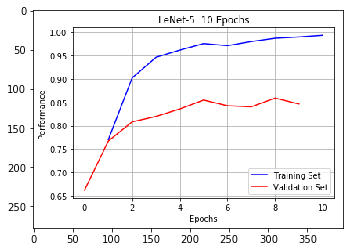

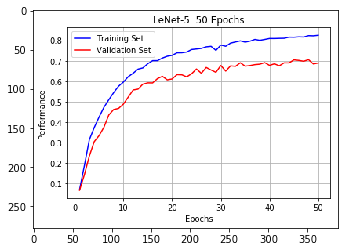

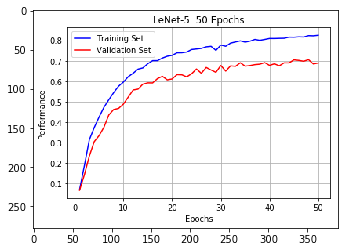

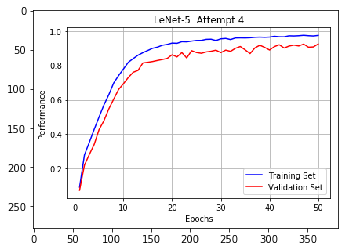

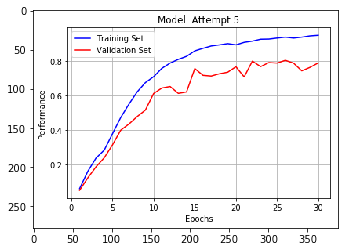

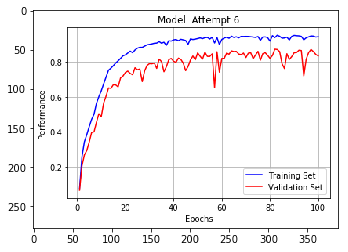

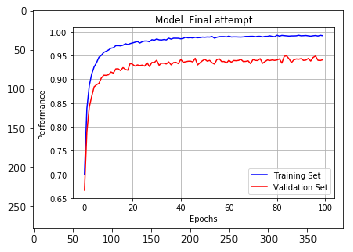

In [9]:

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(plt.imread('./other_images/2.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/3.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/3.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/4.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/5.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/6.png'))
plt.figure()
plt.imshow(plt.imread('./other_images/7.png'))


#### Step 2.3: Model Architecture.

Finally, the main goal was to get a model as simple as possible. For that reason, the following architecture was chosen:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#bbb;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#bbb;color:#594F4F;background-color:#E0FFEB;border-top-width:1px;border-bottom-width:1px;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#bbb;color:#493F3F;background-color:#9DE0AD;border-top-width:1px;border-bottom-width:1px;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">Layer name<br></th>
    <th class="tg-031e">Layer type<br></th>
    <th class="tg-031e">Parameters/Description</th>
  </tr>
  <tr>
    <td class="tg-031e">conv1</td>
    <td class="tg-031e">Convolution</td>
    <td class="tg-031e">Filters: 6 (5x5)<br>Pad: 0<br>At stride: 1<br>Activation: ReLU<br>Input: (32x32x3)<br>Output:(28x28x6)<br></td>
  </tr>
  <tr>
    <td class="tg-031e">drop1a</td>
    <td class="tg-031e">Dropout</td>
    <td class="tg-031e">Keep Prob: 0.8<br></td>
  </tr>
  <tr>
    <td class="tg-031e">pool1</td>
    <td class="tg-031e">Pooling</td>
    <td class="tg-031e">Kernels size: (2x2)<br>Pad: 0<br>At stride: 2<br>Input: (28x28x6)<br>Output: (14x14x6)<br></td>
  </tr>
  <tr>
    <td class="tg-yw4l">drop1b</td>
    <td class="tg-yw4l">Dropout</td>
    <td class="tg-yw4l">Keep Prob: 0.9</td>
  </tr>
  <tr>
    <td class="tg-yw4l">conv2</td>
    <td class="tg-yw4l">Convolution</td>
    <td class="tg-yw4l">Filters: 16 (5x5)<br>Pad: 0<br>At stride: 1<br>Activation: ReLU<br>Input: (14x14x16)<br>Output:(10x10x16)</td>
  </tr>
  <tr>
    <td class="tg-yw4l">drop2a</td>
    <td class="tg-yw4l">Dropout</td>
    <td class="tg-yw4l">Keep Prob: 0.9</td>
  </tr>
  <tr>
    <td class="tg-yw4l">pool2</td>
    <td class="tg-yw4l">Pooling</td>
    <td class="tg-yw4l">Kernels size: (2x2)<br>Pad: 0<br>At stride: 2<br>Input: (10x10x16)<br>Output: (5x5x16)</td>
  </tr>
  <tr>
    <td class="tg-yw4l">drop2b</td>
    <td class="tg-yw4l">Dropout</td>
    <td class="tg-yw4l">Keep Prob: 0.9</td>
  </tr>
  <tr>
    <td class="tg-yw4l">fc0</td>
    <td class="tg-yw4l">Flatten</td>
    <td class="tg-yw4l">Input: (5x5x16)<br>Output: 400 Neurons<br></td>
  </tr>
  <tr>
    <td class="tg-yw4l">fc1</td>
    <td class="tg-yw4l">Fully Connected<br></td>
    <td class="tg-yw4l">Input: 400 Neurons<br>Output: 120 Neurons</td>
  </tr>
  <tr>
    <td class="tg-yw4l">dropfc1</td>
    <td class="tg-yw4l">Dropout</td>
    <td class="tg-yw4l">Keep Prob: 0.9</td>
  </tr>
  <tr>
    <td class="tg-yw4l">fc2</td>
    <td class="tg-yw4l">Fully Connected</td>
    <td class="tg-yw4l">Input: 120 Neurons<br>Output: 84 Neurons</td>
  </tr>
  <tr>
    <td class="tg-yw4l">dropfc2</td>
    <td class="tg-yw4l">Dropout</td>
    <td class="tg-yw4l">Keep Prob: 0.9</td>
  </tr>
  <tr>
    <td class="tg-yw4l">fc3</td>
    <td class="tg-yw4l">Fully Connected</td>
    <td class="tg-yw4l">Input: 84 Neurons<br>Output: 43 Neurons (Class Scores)<br></td>
  </tr>
</table>

With the following hyper parameters values:


* Batch size = 128 
* Training Epochs = 50 (Please check last plot where the model has performace above 93% in validation set after epoch number 25 aproximately ). Was preferred to stop model at 40 epochs to avoid over-training.
* Learning rate : 0.001 (I did not used decaying learning rate because [Adam optimizer computes individual adaptive learning rate](https://arxiv.org/pdf/1412.6980.pdf).
* Dropout probability = 0.1 ( Keep probability 0.9).


**Note**: The selected optimization algoritm was [Adam](https://arxiv.org/pdf/1412.6980.pdf).

In [10]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 256
rate = 0.001

Model architecture was implemented as follows:

In [11]:

from tensorflow.contrib.layers import flatten

tf.reset_default_graph()
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal((5,5,3,6), mean= mu, stddev= sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    drop1a = tf.nn.dropout(conv1, keep_prob=0.8)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(drop1a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    drop1b = tf.nn.dropout(pool1, keep_prob=0.9)


    # TODO: Layer 2: Convolutional. Input= 14x14x16. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal((5,5,6,16), mean= mu, stddev= sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(drop1b, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    drop2a = tf.nn.dropout(conv2, keep_prob=0.9)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(drop2a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    
    drop2b = tf.nn.dropout(pool2, keep_prob=0.9)
    
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.(because 5x5x16 = 400)
    fc0 = flatten(drop2b)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma) )
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    dropfc1 = tf.nn.dropout(fc1, keep_prob=0.9)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(dropfc1, fc2_w) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    dropfc2 = tf.nn.dropout(fc2, keep_prob=0.9)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(dropfc2, fc3_w) + fc3_b
    
    logits = fc3
    
    return logits

Place holders where included to feed_in input data to CNN with labels one-hot enconded.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

Model predictions are followed by softmax probability. Then cross-entropy between predicted labels and expected label values is computed. And the objective function selected was the mean error rate.

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

To report training, valudaton and test model accuracy a custom funtion called *evaluate* was defined.

In [15]:
def evaluate(X_data, y_data):
    
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.5
    
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

After training, model parameters where saved for further model performance evalaution.

In [22]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9

training_acc= []
validation_acc= []
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        training_acc.append(training_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_acc.append(validation_accuracy)
        #print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './checkpoints/lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.730

Validation Accuracy = 0.691

EPOCH 2 ...
Training Accuracy = 0.843

Validation Accuracy = 0.795

EPOCH 3 ...
Training Accuracy = 0.891

Validation Accuracy = 0.837

EPOCH 4 ...
Training Accuracy = 0.912

Validation Accuracy = 0.866

EPOCH 5 ...
Training Accuracy = 0.925

Validation Accuracy = 0.877

EPOCH 6 ...
Training Accuracy = 0.940

Validation Accuracy = 0.887

EPOCH 7 ...
Training Accuracy = 0.946

Validation Accuracy = 0.903

EPOCH 8 ...
Training Accuracy = 0.952

Validation Accuracy = 0.900

EPOCH 9 ...
Training Accuracy = 0.956

Validation Accuracy = 0.910

EPOCH 10 ...
Training Accuracy = 0.958

Validation Accuracy = 0.914

EPOCH 11 ...
Training Accuracy = 0.961

Validation Accuracy = 0.910

EPOCH 12 ...
Training Accuracy = 0.965

Validation Accuracy = 0.919

EPOCH 13 ...
Training Accuracy = 0.967

Validation Accuracy = 0.919

EPOCH 14 ...
Training Accuracy = 0.969

Validation Accuracy = 0.920

EPOCH 15 ...
Training Accuracy

Model output performance for training and validation is shown:

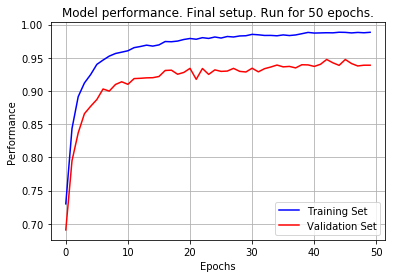

In [46]:
t= np.linspace(1, EPOCHS, EPOCHS)
plt.title('Model performance. Final setup. Run for '+str(EPOCHS)+' epochs.')
plt.plot( np.asarray(training_acc), 'b', label='Training Set')
plt.plot( np.asarray(validation_acc), 'r', label='Validation Set')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

In addtion, model performance with test-set was measured.

In [24]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5

with tf.Session(config=config) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpoints/'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./checkpoints/lenet
Test Accuracy = 0.930


## Step 3: Test the Model on New Images

Five (5) pictures of German traffic signs were downloaded from the web using google browser and other five (5) where downloaded from the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news). Then the pretrained model was used to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Step3.1: Load and Output the Images

A total of 10 new images were used for further testing purposes. Some of them where selected to be the less common classes images in the dataset to test model robustness.

A function to read in images was defined.

In [25]:
def read_image(path_image):
    '''
    Reads in image and used matplotlib.pyplot to display it
    
    path_image: use full path for image. example: /home/andrej/owncloud/images/1_1.jpeg
    '''
    import matplotlib.pyplot as plt
    
    a = plt.imread(path_image)
    #print('Image dimensions:', a.shape)
    plt.imshow(a)    
    return a

The first 5 downloaded images are show below.

* Image with label: 9,No passing. Was selected because is not in he common position of the images from training set. So even if that image class was very common on the training set given the fact that data augmentation was not done is expected to misclasify this image.
* Image with label: 14,Stop. Was taken because semantically is one of the most important traffic signs on the road. The image was selected with high brigtness to test the importance of including contrast enhancement during preprocessing images. This one is expected to be correctly classified.
* Image with label: 20,Dangerous curve to the right. Was chosen for being one with less common class type in the training set. This image is expected to be misclassifed.
* Image with label: 19,Dangerous curve to the left. Was chosen also for being one of the commonless in the training set. Is the flipped verion of the downloaded image with label 20,Dangerous curve to the right. This image is expected to be misclasified too.
* Image with label: 27,Pedestrians. Was selected because in the read is mandatory to detect any information related with pedestrians. In this case, kids from kindergarten.

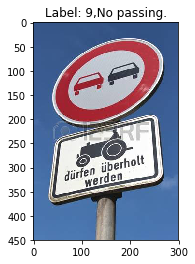

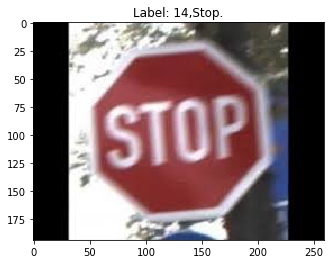

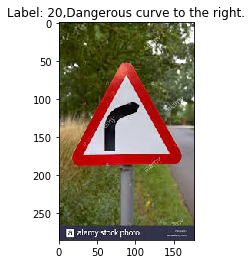

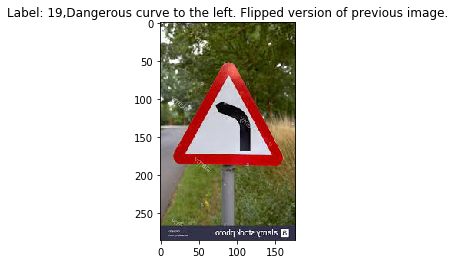

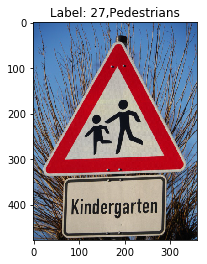

In [26]:

plt.figure()
read_image('./new_images_original/9_1.jpeg')
plt.title('Label: 9,No passing.')

plt.figure()
read_image('./new_images_original/14_1.jpeg')
plt.title('Label: 14,Stop.')

plt.figure()
read_image('./new_images_original/20_1.jpeg')
plt.title('Label: 20,Dangerous curve to the right.')

plt.figure()
read_image('./new_images_original/20_1_flipped.jpeg')
plt.title('Label: 19,Dangerous curve to the left. Flipped version of previous image.')

plt.figure()
read_image('./new_images_original/27_1.jpg')
plt.title('Label: 27,Pedestrians')

plt.show()

The other 5 images were downloaded from the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) and are shown below. They were chosen to be very difficult for me, as a human, to clasify them.

* Image with label: 2,Speed limit (50km/h). Was selected because the image was taken while on the road and some pixels seem to be shifted. It is one of the most common images on the data set so it is expected that it should be correctly classified.
* Image with label: 14,Stop. Was selected because exhibits a very variable level of brigthness among the different pixels. A stop signal is one of the most important signals to be detected.
* Image with label: 25,Road work. Was selected because is one of the classes with the low level number of examples in the training set.
* Image with label:  29,Bicycles crossing. Was chosen becuase as previously mentioned, everything related to pedestrians or human people involved is a priority. Also the image is not easy to identify by a human eye given the fact it has a high brightness level.
* Image with label: 35,Ahead only. Was selected as an attempt to push the network to misclasify it.

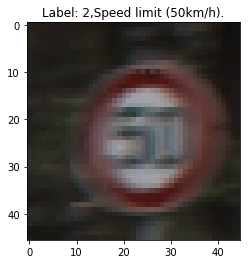

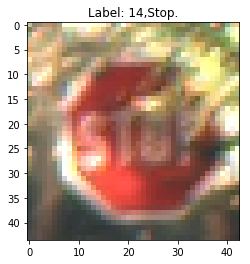

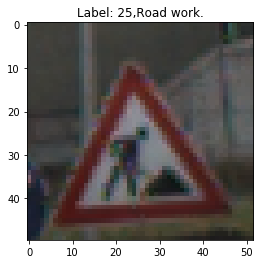

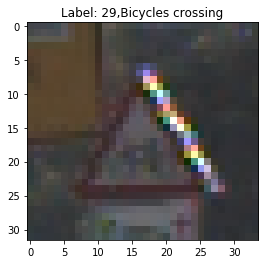

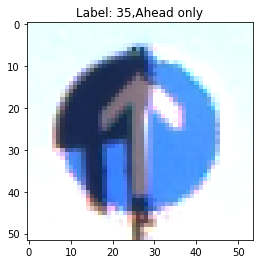

In [27]:
plt.figure()
read_image('./new_images_original/2_1.ppm')
plt.title('Label: 2,Speed limit (50km/h).')

plt.figure()
read_image('./new_images_original/14_2.ppm')
plt.title('Label: 14,Stop.')

plt.figure()
read_image('./new_images_original/25_1.ppm')
plt.title('Label: 25,Road work.')

plt.figure()
read_image('./new_images_original/29_1.ppm')
plt.title('Label: 29,Bicycles crossing')

plt.figure()
read_image('./new_images_original/35_1.ppm')
plt.title('Label: 35,Ahead only')

plt.show()


A function to crop, resize and save downloaded images was defined.

In [28]:
def crop_image(path_in_image, x1,x2,x3,x4, path_out_image, flag):
    '''
    crops images
    path_in_image: use full path for incoming image. example: /home/andrej/owncloud/images/1_1.jpeg
    path_out_image: use full path for outgoing image. example: /home/andrej/owncloud/out_images/1_1_resized.jpeg
    x1,x2,x3,x4: are boundaries to crop image
    '''
    import cv2
    import matplotlib.pyplot as plt
    
    a = read_image(path_in_image)
    
    a_cropped = a[x1:x2, x3:x4]
        
    a_resized = cv2.resize(a_cropped, (32,32))
    print('resized image size:',a_resized.shape)
        
    if flag == 0:
        plt.imshow(a)
    elif flag == 1:
        plt.imshow(a_cropped)
    elif flag == 2:
        plt.imshow(a_resized)
    else:
        None
    
    plt.imsave(path_out_image, a_resized)
    
    return print('resized image and saved in path:', path_out_image)

Downloaded images were cropped, resized to 33x33x3 and then saved in the folder './new_images_resized'.

resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/2_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/9_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/14_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/14_2_resized.png
resized image size: (32, 32, 4)
resized image and saved in path: ./new_images_resized/19_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/20_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/25_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/27_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_images_resized/29_1_resized.png
resized image size: (32, 32, 3)
resized image and saved in path: ./new_imag

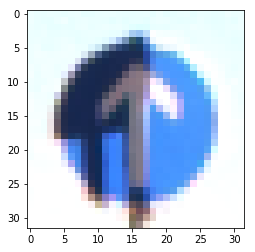

In [47]:
crop_image('./new_images_original/2_1.ppm', 0,45,0,44, './new_images_resized/2_1_resized.png',2)
crop_image('./new_images_original/9_1.jpeg', 25,220,35,275, './new_images_resized/9_1_resized.png',2)
crop_image('./new_images_original/14_1.jpeg', 15,180,45,215, './new_images_resized/14_1_resized.png',2)
crop_image('./new_images_original/14_2.ppm', 0,43,0,42, './new_images_resized/14_2_resized.png',2)
crop_image('./new_images_original/20_1_flipped.jpeg', 45,190,15,165, './new_images_resized/19_1_resized.png',2)
crop_image('./new_images_original/20_1.jpeg', 45,190,15,165, './new_images_resized/20_1_resized.png',2)
crop_image('./new_images_original/25_1.ppm', 0,49,0,51, './new_images_resized/25_1_resized.png',2)
crop_image('./new_images_original/27_1.jpg', 35,345,15,340, './new_images_resized/27_1_resized.png',2)
crop_image('./new_images_original/29_1.ppm', 0,31,0,33, './new_images_resized/29_1_resized.png',2)
crop_image('./new_images_original/35_1.ppm', 0,51,0,53, './new_images_resized/35_1_resized.png',2)


A type list variable with cropped and resized images was created. Also a vector with expected labels was created.

In [33]:
# Names of the new incoming images.
in_images_names=['2_1_resized.png', '9_1_resized.png', '14_1_resized.png', '14_2_resized.png', '19_1_resized.png', '20_1_resized.png','25_1_resized.png', '27_1_resized.png', '29_1_resized.png', '35_1_resized.png' ]
# Expected labels for the new incoming images.
expected_labels_new=[2,9,14,14,19,20,25,27,29,35]


All new images are uploaded in a single mini data set variable with name *X_new*.

In [34]:
X_newr = []
for i in in_images_names:
    #print(i)
    X_newr.append (cv2.imread('./new_images_resized/'+ i)[:,:,:3] )

X_new = np.asarray( X_newr )

As for image preprocessing, Contrast enhacement  and image normalization was done to the new data set.

In [35]:
for i in range(X_new.shape[0]):
    X_new[i][:,:,0] = clahe.apply(X_new[i][:,:,0])
    X_new[i][:,:,1] = clahe.apply(X_new[i][:,:,1])
    X_new[i][:,:,2] = clahe.apply(X_new[i][:,:,2])

In [36]:
X_new = X_new - tmean
X_new = X_new/tstd

print('New mini batch dataset mean:', np.mean(X_new))
print('New mini batch dataset standard deviation:', np.std(X_new))

New mini batch dataset mean: 0.806326118699
New mini batch dataset standard deviation: 0.961723130212


Notice that the mean for the new images is far away from being zero, so it is expected some data be outside the expected manifold. However, is near to be unit variance data.

### Step 3.2: Performance on new images

After prerpoced the new input data, then the pretrained model is loaded and tested with new mini dataset of 10 images.

In [37]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9


with tf.Session(config=config) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpoints/'))

    new_predicted = sess.run( tf.argmax(logits, 1), feed_dict={x:X_new })
    print('new_predicted values:', new_predicted)

INFO:tensorflow:Restoring parameters from ./checkpoints/lenet
new_predicted values: [ 2  9 13 38 35 36 25 28 10  9]


Predicted labels (network output scores) are in the variable with name **new_predicted** and they are going to be compared with the expected labels saved on the variable **expected_labels_new** for the incoming new images.


In [40]:
print('Please compare predicted output with expected output:')
print('new_predicted values:', new_predicted)
print('expected_labels_new: ', np.asarray(expected_labels_new))

Please compare predicted output with expected output:
new_predicted values: [ 2  9 13 38 35 36 25 28 10  9]
expected_labels_new:  [ 2  9 14 14 19 20 25 27 29 35]


Predicted values changed with every run. So in the first run we had 3/10 predicted classes, that is 30% of accuracy in the new images. 

**Note**: Please notice that the previous way to measure performance is not statistically significant. We should perform previous test many times and average results to get a better insight about the real model performance in the new images.

#### Test set Accuracy vs New downloaded images accuracy discussion.

From the test set the minimum accuracy performance obtained was 93% in a total  of 12630 examples. By the other hand, the accuracy on the mini data sample set from the downloaded images after running just one time was 3/10 = 30% in a total of 10 images.

Notice that the amount of image examples from test set is bigger that the amount of examples in the mini data set of new downloaded images in a ratio of 12360/10 = 1236.

Reader migth be tempted to make a performance comparison between *test* and *new images* data sets. In fact, you can be tempted to concluded that *the probability that **the accuracy of 93% obtained in the test set** to characterize the network performance is higher than the probability that **the accuracy of 30% obtained on the new mini set***.
However, that asumption might not be true and is preferred not to generate affirmations before studying better the test data set and the new images mini data set.

In addition, author does not compromise to any conclusion about this attempt to compare *test_set* with *new_imags_mini_dataset*.

### Step 3.3: Output Top 5 Softmax Probabilities For Each Image Found on the Web

In this subsection top softmax probabilities for each new image found on the web are displayed.

A new function to get top 5 probabilities was defined.

In [41]:
def get_top_five(in_image):
    
    with tf.Session(config=config) as sess:
        saver.restore(sess, tf.train.latest_checkpoint('./checkpoints/'))
        
        softmax = tf.nn.softmax(logits)
        top_prob = tf.nn.top_k(softmax, k =5 )
        top_five = sess.run( top_prob, feed_dict={x: in_image })
        #print(top_five)
    return top_five

A function to plot top 5 predicted probabilities was defined.

In [42]:
def plot_5_prob(top_k, path_in_image, image_label):
    '''
    Plots top 5 logits probabilities in new images
    
    top_k: Vector with top predictions
    path_in_image: (str). Full path for image used for testing the model. Example: './new_images_resized/2_1_resized.png'
    image_label: (str). Label number for the class the image belongs to. Example: '2'
    '''
    certainty = np.asarray(top_k[0][0])
    #predValues= list(map(unicode,list(top_k[1][0])))
    predValues= list(top_k[1][0])
    y_pos = np.arange(len(certainty))
    
    inImg= plt.imread(path_in_image)
    
    im1 = plt.subplot(1,2,1)
    plt.imshow(inImg)
    plt.title('Expected label: '+str(image_label))


    im2 = plt.subplot(1,2,2)
    im2.set_yticks(y_pos+0.1)
    im2.set_yticklabels(predValues)
    im2.barh(y_pos, certainty)
    im2.invert_yaxis()    

    plt.title('Top 5 probabilities predicted.')

    plt.show()


0
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


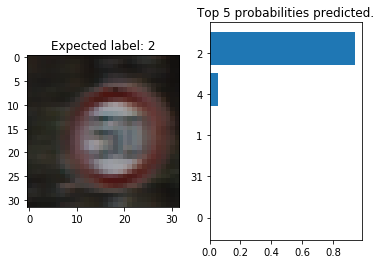

1
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


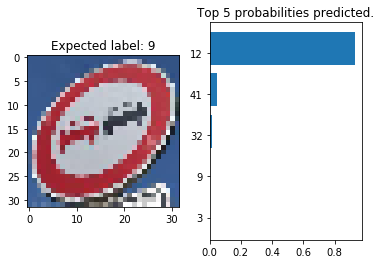

2
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


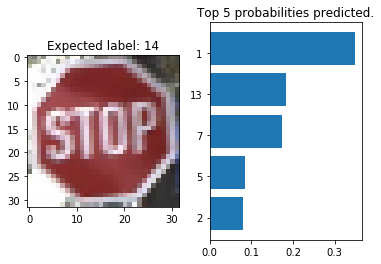

3
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


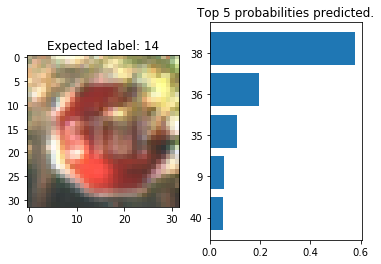

4
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


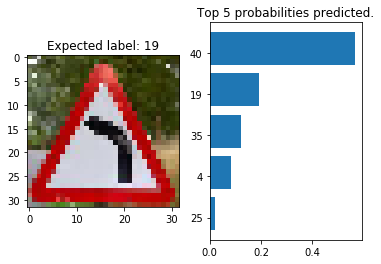

5
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


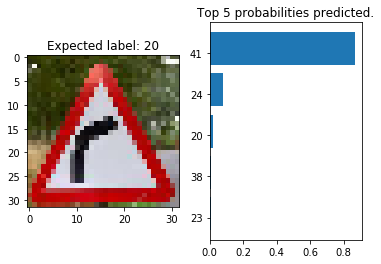

6
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


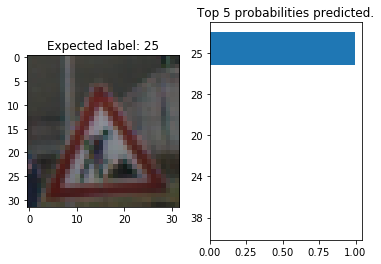

7
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


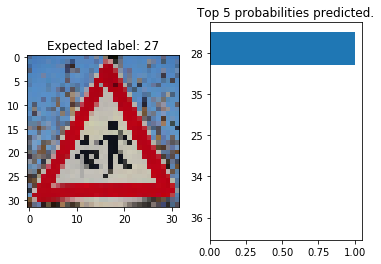

8
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


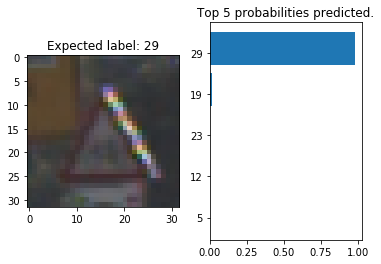

9
INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


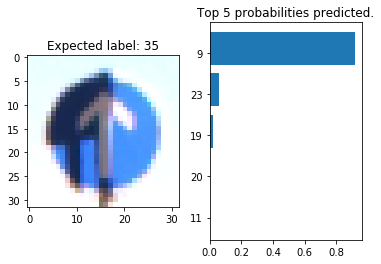

In [43]:
for i in range (len(in_images_names)):
    print(i)
    aux = np.reshape(X_new[i], (1,32,32,3))
    aux2 = get_top_five(aux)
    plot_5_prob(aux2, './new_images_resized/'+str(in_images_names[i]), str(expected_labels_new[i]))

#### Model Certainty- Softmax Probabilities discussion.

1. Notice that the fact that the model predicts a class label with probability 1 does not necessarily implies that the clasification is correct, it might be wrong. 

    For example, in the image with *expected label:25* the softmax probability of being label as 'predicted_label:25' was  1 = 100%. However for the image with *expected label: 27* the softmax probability of being labeled as 'predicted_label:28' was 1, which is totally wrong.
    
    Also please notice that the amount of examples for class '25' is one of the most common in training set, but, the amount of examples for class '27' is one of the commonless.
    
2. Notice that sometimes the expected label number was not listed in the top 5 softmax probabilities, showing that the trained network has real trouble clasifiying these images.

3. Notice also that the network was tested just one time with the *new mini data set of images downloaded from the web*. So you will have different performance every time you run the test in this new mini data set.

## Step 4: Visualize the Neural Network's State with Test Images

On this section a visualization of the filters activation is done but not the one with the activation maps.

Withal, the author is working in extracting the feature maps from hidden layers just to check hidden layers networks response.

A new function to plot filters activation and feature maps was defined as follows:

In [44]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('Filter ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

An stimulus image is used to get the filters response.

INFO:tensorflow:Restoring parameters from ./checkpoints/lenet


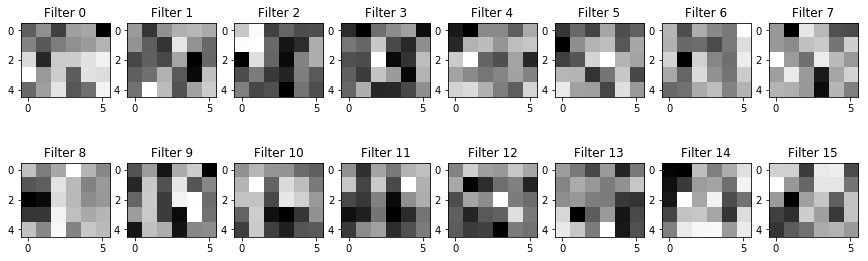

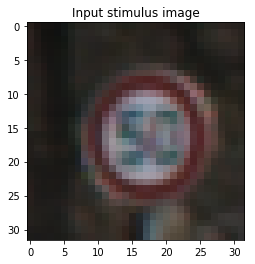

In [45]:
stimulus_image= (X_newr[0]-tmean)/tstd

with tf.Session(config=config) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpoints/'))

    #for var in tf.trainable_variables():
    #    print(var)
    
    layer = sess.graph.get_tensor_by_name( 'Variable_2:0')
    outputFeatureMap(image_input=np.reshape(stimulus_image, (1,32,32,3)), tf_activation=layer)

plt.figure()
plt.title('Input stimulus image')
plt.imshow(X_trainr[31895])
plt.show()

### Conclusion


This project is succesful to clasiffy images from [German Traffic Signs data set](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) with a minimum accuracy of 93% in validation set. However, is very clear that the model robustness can be strengtened by increasing the number of commonless examples in the data set.



To improve:

* During model architecture design It was noticed that the networks highly tends to overfit the training data. So stronger regularization is required (e.g. [cross-validation](http://ai.stanford.edu/~ang/papers/cv-final.pdf) or [k-cross-validation](http://leitang.net/papers/ency-cross-validation.pdf)).
* The data mean and variance where changing as data flew upwards the network and many gradients were killed during backpropagation, so [batch normalization](https://arxiv.org/abs/1502.03167) is highly encouraged to be included.
* Other model architectures should be tested to compare with solution proposed ( e.g. [VGGNet](https://arxiv.org/abs/1409.1556), [GoogLeNet](https://arxiv.org/abs/1409.4842), a [multiscale CNN](https://arxiv.org/abs/1607.07155)).
* Database should be balanced to increase the number of commonless examples. (e.g. [Data augmentation](https://arxiv.org/abs/1703.08383)).
* [Feature maps](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) should be shown, not just the filters used in cross-correlation at receptive fields.
